## Jess's DIGBlood IPython notebook

In [189]:
# Import stuff
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from __future__ import division
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [190]:
df = pd.DataFrame.from_csv('/Users/jesskerlin/Documents/GitHub/digblood/blood_train.csv')
df.columns = [c.replace(' ', '_') for c in df.columns]

In [191]:
#Show the first few lines of the database
df[:5]

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated_(c.c.),Months_since_First_Donation,Made_Donation_in_March_2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [192]:

pearsonr(df['Number_of_Donations'],df['Total_Volume_Donated_(c.c.)'])

(1.0, 0.0)

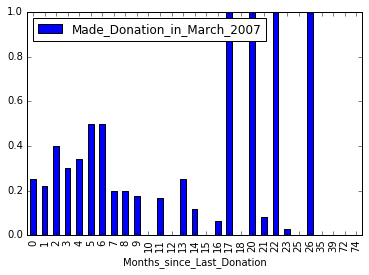

In [193]:
data = df[['Months_since_Last_Donation','Made_Donation_in_March_2007']].groupby(['Months_since_Last_Donation']).mean().plot(kind = 'bar')


(array([  2.025,   2.075,   2.125, ...,  97.875,  97.925,  97.975]), array([ 0.18952158,  0.19123849,  0.19303602, ...,  0.49698717,
        0.49740469,  0.49776461]))
[ 0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4

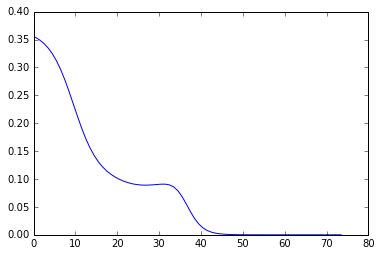

In [207]:
# From http://stackoverflow.com/questions/18517722/weighted-moving-average-in-python 
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

data = df[['Months_since_First_Donation','Made_Donation_in_March_2007']].groupby(['Months_since_First_Donation']).mean()
count = df[['Months_since_First_Donation','Made_Donation_in_March_2007']].groupby(['Months_since_First_Donation']).mean()
df = df.sort_values('Months_since_Last_Donation')
x = df['Months_since_Last_Donation'].values #.apply(lambda x: np.log(x)).
y = df['Made_Donation_in_March_2007'].values
scipy.stats.halfnorm
x_out,y_out = weighted_moving_average(x,y,step_size = 1,width = 5)
print smoothed
plt.plot(x_out,y_out)
print x

#plt.bar(data.index,data.Made_Donation_in_March_2007)

In [197]:
print x

[       -inf        -inf        -inf        -inf  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718  0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718  0.693

Since Total Volume Donated adds no information, I won't include it as a feature.

In [195]:
df.drop('Total_Volume_Donated_(c.c.)', axis = 1)
model = smf.ols('Made_Donation_in_March_2007 ~ Months_since_Last_Donation + Number_of_Donations + Months_since_First_Donation', data = df)
result = model.fit()
result.summary()
result.fittedvalues

436    0.366096
214    0.343896
676    0.310818
664    0.515535
358    0.602107
607    0.347716
182    0.285178
164    0.462686
106    0.325693
285    0.448608
330    0.437552
441    0.551485
258    0.394102
291    0.308770
392    0.308770
589    0.308770
220    0.308770
410    0.308770
88     0.308770
619    1.106322
631    0.292705
618    0.275603
238    0.294691
587    0.308770
655    0.261525
700    0.126429
19     0.288645
434    0.218251
195    0.251418
519    0.199074
         ...   
645    0.029055
538    0.059198
451    0.640713
325    0.254074
193    0.104635
378    0.068268
597   -0.109064
295   -0.080818
475    0.021971
141    0.046068
576    0.046068
78     0.059198
110    0.046068
588    0.046068
388    0.046068
117    0.046068
514    0.014976
739    0.036050
604    0.039073
22     0.327756
595    0.046157
210    0.053152
180    0.060236
554    0.046068
183    0.056467
281    0.027804
673   -0.147321
541   -0.154085
74    -0.566903
350   -0.591922
dtype: float64

In [49]:
df.keys()


Index([u'Months since Last Donation', u'Number of Donations',
       u'Total Volume Donated (c.c.)', u'Months since First Donation',
       u'Made Donation in March 2007', u'Means'],
      dtype='object')

In [56]:
mean = df['Made Donation in March 2007'].mean()
df['Means'] = np.ones([576,1])*mean
print df['Means']

619    0.239583
664    0.239583
441    0.239583
160    0.239583
358    0.239583
335    0.239583
47     0.239583
164    0.239583
736    0.239583
436    0.239583
460    0.239583
285    0.239583
499    0.239583
356    0.239583
40     0.239583
191    0.239583
638    0.239583
345    0.239583
463    0.239583
372    0.239583
8      0.239583
539    0.239583
734    0.239583
573    0.239583
482    0.239583
330    0.239583
222    0.239583
175    0.239583
606    0.239583
340    0.239583
         ...   
577    0.239583
118    0.239583
532    0.239583
338    0.239583
365    0.239583
173    0.239583
715    0.239583
2      0.239583
387    0.239583
738    0.239583
610    0.239583
450    0.239583
232    0.239583
440    0.239583
183    0.239583
60     0.239583
58     0.239583
49     0.239583
674    0.239583
204    0.239583
361    0.239583
30     0.239583
337    0.239583
496    0.239583
169    0.239583
698    0.239583
433    0.239583
360    0.239583
541    0.239583
74     0.239583
Name: Means, dtype: floa

In [62]:
# Training evaluation
from sklearn.metrics import log_loss
pred = np.array(df.Means)
actual = df['Made Donation in March 2007']
print 'Training log-loss score ' + str(log_loss(actual,pred))

Training log-loss score 0.550599168862
